# IMPORT LIBRARIES & DATA

In [1]:
from GA import solve, solve_rlga, solve_gasa
from TSP import compute_distance_matrix, visualize
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import pickle
import time

In [2]:

file_path = '../data/5_CentralRegion.csv'

In [3]:
locations = pd.read_csv(file_path, header=None).values
locations 

array([['province', 'lat', 'lon'],
       ['Thanh Hóa', '19.9781573', '105.4816107'],
       ['Nghệ An', '19.1976001', '105.0606760'],
       ['Hà Tĩnh', '18.3504832', '105.7623047'],
       ['Quảng Bình', '17.5095990', '106.4004452'],
       ['Quảng Trị', '16.7897806', '106.9797431'],
       ['Thừa Thiên Huế', '16.4639321', '107.5863388'],
       ['Quảng Nam', '15.5761698', '108.0527132'],
       ['Quảng Ngãi', '14.9953739', '108.6917290'],
       ['Bình Định', '14.0779378', '108.9898798'],
       ['Phú Yên', '13.1912633', '109.1273678'],
       ['Khánh Hòa', '12.2980751', '108.9950386'],
       ['Ninh Thuận', '11.6965639', '108.8928476'],
       ['Bình Thuận', '11.1041572', '108.1832931'],
       ['Kon Tum', '14.6995372', '107.9323831'],
       ['Gia Lai', '13.8177445', '108.2004015'],
       ['Đắk Lắk', '12.8292274', '108.2999058'],
       ['Đắk Nông', '12.2818851', '107.7302484'],
       ['Lâm Đồng', '11.6614957', '108.1335279'],
       ['Đà Nẵng', '16.0680000', '108.2120000']], dt

In [4]:
locations_numeric = locations[1:, 1:].astype(float)

distance_matrix = compute_distance_matrix(locations_numeric)

In [5]:
# Danh sách các thuật toán
mutation_algorithms = ['swap', 'scramble', 'inversion', 'insertion']
crossover_algorithms = ['order', 'single_point', 'two_point', 'uniform']
selection_algorithms = ['elitism', 'tournament', 'rank', 'roulette_wheel']

In [6]:

def run_and_record(name, solve_func):
    start = time.time()
    best_fitness, best_route, fitness_history = solve_func()
    end = time.time()

    fir = (fitness_history[0] - fitness_history[-1]) / len(fitness_history)
    std_dev = np.std(fitness_history)
    duration = end - start

    return {
        'name': name,
        'best_fitness': best_fitness,
        'std_dev': std_dev,
        'fir': fir,
        'duration': duration,
        'fitness_history': fitness_history
    }

In [7]:
# So sánh 3 thuật toán
results = [
    run_and_record("GA (swap+single_point+tournament)", lambda: solve(distance_matrix)),
    run_and_record("RLGA", lambda: solve_rlga(distance_matrix)),
    run_and_record("GA + SA", lambda: solve_gasa(distance_matrix))
]


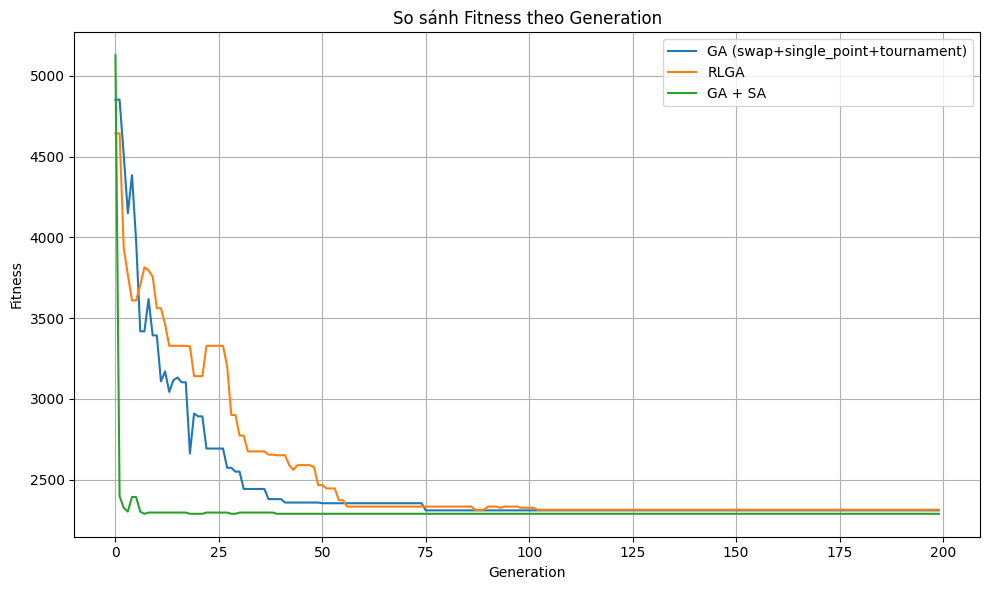

                          Thuật toán  Best Fitness   Std Dev  FIR (Hội tụ)  \
0  GA (swap+single_point+tournament)     2309.0693  427.5464     12.717424   
1                               RLGA     2313.0473  444.8459     11.653653   
2                            GA + SA     2287.8776  200.5167     14.197640   

   Thời gian (s)  
0          0.380  
1          0.397  
2          7.069  


In [8]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
for res in results:
    plt.plot(res['fitness_history'], label=res['name'])
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("So sánh Fitness theo Generation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Bảng tổng hợp
df = pd.DataFrame([{
    'Thuật toán': r['name'],
    'Best Fitness': round(r['best_fitness'], 4),
    'Std Dev': round(r['std_dev'], 4),
    'FIR (Hội tụ)': round(r['fir'], 6),
    'Thời gian (s)': round(r['duration'], 3)
} for r in results])

print(df)